In [1]:
import numpy as np
import praw
from praw.models import MoreComments
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return(score)


In [3]:
reddit = praw.Reddit(client_id='j3uScZz6iIfIRw', \
                     client_secret='8AgY4HS_hW8l759pQvFlttU1A3c', \
                     user_agent='Sentiment', \
                     username='kilejohnson', \
                     password='sxXS!&65ZyZ!&3R9YotH')

In [4]:
def comment_analyzer(submission_id):
    submission = reddit.submission(submission_id)
    submission.comments.replace_more(limit=None)
    comment_list = [comment.body for comment in submission.comments.list()]
    comment_sentiment = [sentiment_analyzer_scores(comment)['compound'] for comment in comment_list]
    return np.average(comment_sentiment)

In [5]:
print(comment_analyzer('6gkd6v'))

0.20068319088319087


In [6]:
subreddit = reddit.subreddit('Ethtrader')
top_subreddit = subreddit.top(limit=1000)

In [7]:
topics_dict = { "title":[], 
                "id":[],
                "url":[], 
               "submission_sentiment":[],
                "num_of_comms": [], 
               "comments_sentiment" : [],
                "created": [] 
              }

In [ ]:
for submission in top_subreddit:
    topics_dict["title"].append(submission.title)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["submission_sentiment"].append(sentiment_analyzer_scores(submission.title)['compound'])
    topics_dict["num_of_comms"].append(submission.num_comments)
    topics_dict['comments_sentiment'].append(comment_analyzer(submission.id))
    topics_dict["created"].append(submission.created)

In [9]:
topics_data = pd.DataFrame(topics_dict)

In [10]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [11]:
_timestamp = topics_data["created"].apply(get_date)

In [12]:
topics_data = topics_data.assign(timestamp = _timestamp)
topics_data = topics_data.drop('created', axis=1)

In [13]:
topics_data.head()

,title,id,url,submission_sentiment,num_of_comms,comments_sentiment,timestamp
0,Everytime Bitcoin drops,7lusyi,https://gfycat.com/defenselessmiserableiberian...,0.0000,349,0.135494,2017-12-24 06:54:20
1,Here you go,7qvmvq,https://i.redd.it/tpypv1c7xha01.jpg,0.0000,311,0.141956,2018-01-16 16:16:23
2,"Welcome to r/ethtrader new people, let me save...",6gkd6v,http://i.imgur.com/RW0s5gB.gifv,0.7351,365,0.200683,2017-06-11 04:20:21
3,Dips are just happy little accidents,7qr0jq,https://i.redd.it/m6jwe1ns6ea01.jpg,0.4005,212,0.103242,2018-01-16 03:42:16
4,"I'm a longterm hodler, but even i hate this su...",7rba5b,https://imgur.com/jjCNiyp,-0.7227,281,0.140592,2018-01-18 12:24:03


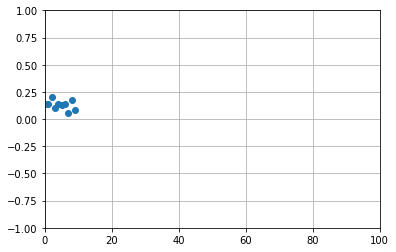

In [14]:
plt.scatter(x=topics_data.index, y = topics_data['comments_sentiment'])
plt.xlim([0, 100])
plt.ylim([-1, 1])
plt.grid(True)
plt.show()

In [25]:
comment_list = []
comment_compound = []
submission = reddit.submission(id='7qr0jq')
submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    comment_list.append(comment.body)
comment_list

['Consider this meme officially endorsed.',
 'Hurts when you buy before the dip ;-; ',
 "It's all fun and game until you realize you jump the gun before the dip:(",
 'Get all these get-rich-quick weak hands out of here.. GET EM OUT.',
 'over at r/eth i was told im missing the point and that this is not a get rich scheme. Am I crazy to be investing in Ethereum as a student. I wasnt expecting a lambo, but i was hoping it could help pay off student debt after a couple years. Im asking bc everything is "on sale" and my beer dollars here or there goes further now. I keep missing the point apparently, but genuinely want to know what I am missing.',
 'Dips are a very nice opportunity! Ether is nearly in a 30% sale',
 "I own ETH, but do any of you actually use it for it's intended purposes?  I'm just worried everyone is buying it and holding it and looking around at each other agreeing that it should go up.  Isn't its real value in its use?",
 'I call it a sale ',
 "It's funny how the basics s

In [ ]:
for comment in comment_list:
    comment_compound.append(sentiment_analyzer_scores(comment)['compound'])
comment_compound

In [15]:
comments = subreddit.comments(limit=1000)

In [16]:
comment_dict = { 
                "link_id":[],
                "parent_id":[],
                "url":[], 
                "created": [], 
                "body":[],               
                "neg":[],
                  "neu":[],
                  "pos":[],
                    "compound":[]}

In [17]:
for comment in comments:
    comment_dict['link_id'].append(comment.link_id)
    comment_dict['parent_id'].append(comment.parent_id)
    comment_dict['url'].append(comment.link_url)
    comment_dict['created'].append(comment.created)
    comment_dict['body'].append(comment.body)
    comment_dict['neg'].append(sentiment_analyzer_scores(comment.body)['neg'])
    comment_dict['neu'].append(sentiment_analyzer_scores(comment.body)['neu'])
    comment_dict['pos'].append(sentiment_analyzer_scores(comment.body)['pos'])
    comment_dict['compound'].append(sentiment_analyzer_scores(comment.body)['compound'])

In [18]:
comment_data = pd.DataFrame(comment_dict)
comment_data = comment_data.assign(timestamp = _timestamp)
comment_data = comment_data.drop('created', axis=1)
comment_data.tail()


,link_id,parent_id,url,body,neg,neu,pos,compound,timestamp
988,t3_awr8yb,t1_ehqj304,https://www.reddit.com/r/ethtrader/comments/aw...,ETH caught hard depression,0.718,0.282,0.000,-0.6249,NaT
989,t3_awxxh5,t3_awxxh5,https://www.reddit.com/r/ethtrader/comments/aw...,You're giving investment advice anonymously ov...,0.083,0.849,0.069,-0.3611,NaT
990,t3_awxxh5,t1_ehqh8sy,https://www.reddit.com/r/ethtrader/comments/aw...,There is no spread or conversion fee between U...,0.094,0.766,0.140,0.2732,NaT
991,t3_awxxh5,t1_ehqe4vv,https://www.reddit.com/r/ethtrader/comments/aw...,"Your reasoning isn't entirely accurate, but in...",0.000,0.871,0.129,0.6120,NaT
992,t3_awxxh5,t1_ehq7t70,https://www.reddit.com/r/ethtrader/comments/aw...,"No, this is inaccurate. The decentralized exch...",0.147,0.853,0.000,-0.6124,NaT


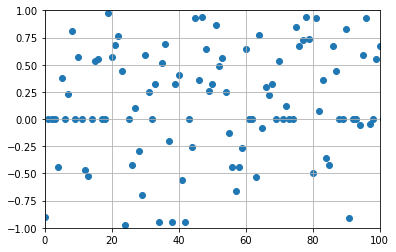

In [19]:
plt.scatter(x=comment_data.index, y = comment_data['compound'])
plt.xlim([0, 100])
plt.ylim([-1, 1])
plt.grid(True)
plt.show()

In [20]:
def word_cloud(comment):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in comment])
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        width = 1600,
        height = 800,
        random_state = 21,
        colormap = 'jet',
        max_words = 50,
        max_font_size=200).generate(all_words)
 
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show();      
    

In [21]:
def word_list(df):
    wrd_list = []
    for row in df.itertuples():
        wrd_list.append(row.body)
    return wrd_list
    

In [22]:
reddit_comments = word_list(comment_data)

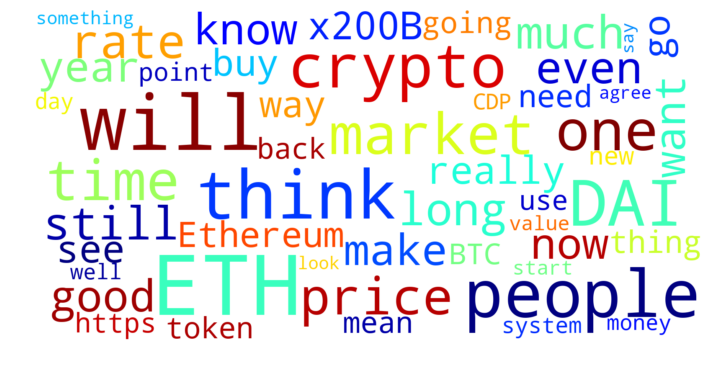

In [23]:
word_cloud(reddit_comments)